# 学習アルゴリズムの実装

1. ミニバッチ
訓練データの中からランダムに一部のデータを選び出す。
2. 勾配の算出
各重みの勾配を求める。
3. パラメータの更新
重みパラメータを勾配方向に微少量だけ更新する。
4. ステップ1から3を繰り返す



In [1]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNetで作成します。


↓実際のコード

In [2]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y =softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [3]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [4]:
net.params['W1'].shape

(784, 100)

In [5]:
net.params['b1'].shape

(100,)

In [6]:
net.params['W2'].shape

(100, 10)

In [7]:
net.params['b2'].shape

(10,)

# ミニバッチ学習の実装

In [8]:
import numpy as np
from dataset.mnist import load_mnist

In [9]:
# テストとトレーニングデータ
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [10]:
# 空のリストの作成
train_loss_list = []

In [11]:
# ハイパーパラメーターの作成
iters_num = 3
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [12]:
count = 0
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(count)
    count = count + 1

0
1
2


## 損失関数の推移をグラフ化してみる。

In [13]:
 len(train_loss_list)

3

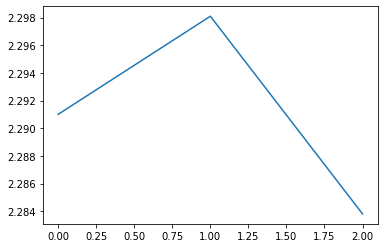

In [15]:
import matplotlib.pyplot as plt

iteration = [n for n in range(3)]

x = iteration 
y = train_loss_list

plt.plot(x, y);

# テストデータで評価してみる。

In [18]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1 エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

In [19]:
# ハイパーパラメーターの作成(その２)　
# その１とほぼ同じだが、コメントアウト部分を行っていない。

iters_num = 3
# train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [23]:
count = 0
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))
    
    print(count)
    count = count + 1

train acc, test acc |0.11236666666666667,0.1135
0
1
2


In [ ]:
import matplotlib.pyplot as plt

epochs = [n for n in range(3)]

x = iteration 
y = train_loss_list

plt.plot(x, y);

In [24]:
# これを入れる。
train_acc_list

[0.11236666666666667]

In [25]:
# testはこれを入れる。
test_acc_list

[0.1135]

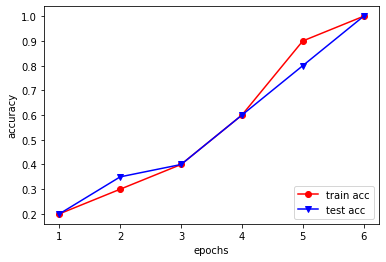

In [48]:
#ライブラリのインポート
import matplotlib.pyplot as plt

#1つ目の表示するデータを用意
x1 = [1, 2, 3, 4, 5, 6]
y1 = [0.2, 0.3, 0.4, 0.6, 0.9, 1.0]

#2つ目の表示するデータを用意
x2 = [1, 2, 3, 4, 5, 6]
y2 = [0.2, 0.35, 0.4, 0.6, 0.8, 1.0]

#1つ目のデータをplotメソッドでプロット
plt.plot(x1, y1, color = 'red', marker = 'o', label="train acc")

#2つ目のデータをplotメソッドでプロット
plt.plot(x2, y2, color = 'blue', marker = 'v', label="test acc")

# ラベル
plt.xlabel("epochs")
plt.ylabel("accuracy")

# legend(凡例)付きで表示。凡例は右下にしている。デフォルトは、左上。
plt.legend(loc='lower right')

# まとめ